In [1]:
import pandas as pd
df=pd.read_csv("respiratory_disease.csv")
df

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis
0,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,['influenza'],True,True
1,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:18:14,0,52.0,['acute nasopharyngitis'],True,True
2,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,['acute upper respiratory infections'],True,True
3,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367938e+09,12:42:33,0,6.0,['acute nasopharyngitis'],True,True
4,2019-06-28,West,Uttam Nagar,320720,Pramod,1.367938e+09,12:21:19,0,26.0,['bronchitis'],True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
337300,2017-12-19,West,Shakurbasti,150706,guest.150706,1.354077e+09,22:22:40,0,15.0,['acute nasopharyngitis'],True,True
337301,2018-05-04,West,Nangloi,110703,guest.110703,1.125356e+09,13:14:16,1,25.0,['acute upper respiratory infections'],True,True
337302,2018-02-23,West,Uttam Nagar,320721,guest.320721,1.053347e+09,11:33:20,1,56.0,['acute nasopharyngitis'],True,True
337303,2017-06-27,West,Rajouri Garden,270707,guest.270707,1.284592e+09,10:39:19,1,1.3,['acute upper respiratory infections'],True,True


In [2]:
# Step 1: Group by 'medongoid' and check the distinct 'gender' values for each 'medongoid'
medongoid_gender = df.groupby('medongoid')['gender'].nunique()

# Step 2: Identify medongoid values where gender has both 0 and 1
invalid_medongoids = medongoid_gender[medongoid_gender > 1].index

# Step 3: Drop rows with those invalid 'medongoid' values
df_cleaned = df[~df['medongoid'].isin(invalid_medongoids)]

# Optional: If you want to view the invalid medongoid list
print("Invalid medongoids (with both gender 0 and 1):")
print(invalid_medongoids)

# Verify by checking the shape of the cleaned dataframe
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")
df=df_cleaned


Invalid medongoids (with both gender 0 and 1):
Index([1360000000.0, 1367000000.0], dtype='float64', name='medongoid')
Original data shape: (337305, 12)
Cleaned data shape: (337278, 12)


In [3]:
# Step 1: Group by 'medongoid' and check the distinct 'gender' values for each 'medongoid'
medongoid_gender = df.groupby('medongoid')['gender'].nunique()

# Step 2: Identify medongoid values where gender has both 0 and 1
invalid_medongoids = medongoid_gender[medongoid_gender > 1].index

# Step 3: Drop rows with those invalid 'medongoid' values
df_cleaned = df[~df['medongoid'].isin(invalid_medongoids)]

# Optional: If you want to view the invalid medongoid list
print("Invalid medongoids (with both gender 0 and 1):")
print(invalid_medongoids)

# Verify by checking the shape of the cleaned dataframe
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")
df=df_cleaned


Invalid medongoids (with both gender 0 and 1):
Index([], dtype='float64', name='medongoid')
Original data shape: (337278, 12)
Cleaned data shape: (337278, 12)


In [4]:
# Step 1: Group by 'medongoid' and get the distinct 'age' values for each 'medongoid'
medongoid_ages = df.groupby('medongoid')['age'].nunique()

# Step 2: Identify 'medongoid' values that have more than 2 distinct ages
invalid_medongoids_more_than_2_ages = medongoid_ages[medongoid_ages > 2].index

# Step 3: Drop rows with 'medongoid' values having more than 2 distinct ages
df_cleaned = df[~df['medongoid'].isin(invalid_medongoids_more_than_2_ages)]

# Optional: Verify by checking the shape of the cleaned dataframe
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")

# Optionally, you can print out the IDs with more than 2 ages
print("medongoid values with more than 2 distinct ages:")
print(invalid_medongoids_more_than_2_ages)



Original data shape: (337278, 12)
Cleaned data shape: (337278, 12)
medongoid values with more than 2 distinct ages:
Index([], dtype='float64', name='medongoid')


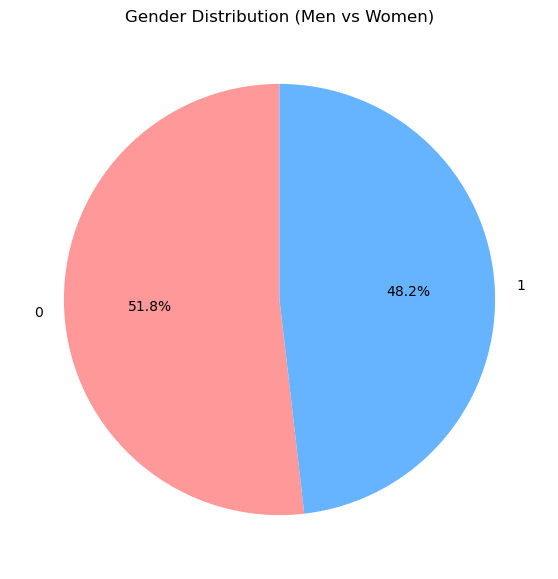

In [5]:
import matplotlib.pyplot as plt

# Step 1: Pie chart for gender distribution (Men vs Women)
gender_counts = df['gender'].value_counts()
gender_labels = ['0', '1']  

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution (Men vs Women)')
plt.show()


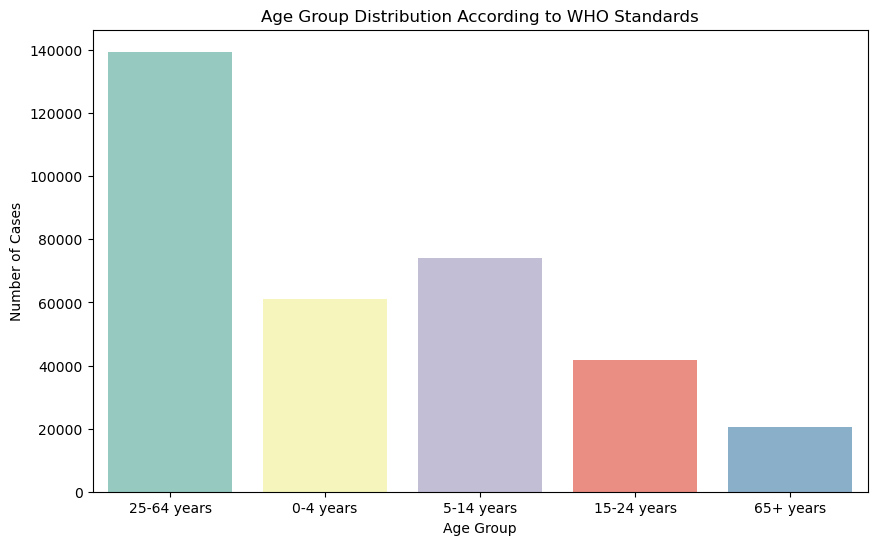

In [6]:
import seaborn as sns

# Step 2: Age group distribution based on WHO standard
def age_group(age):
    if age <= 4:
        return '0-4 years'
    elif age <= 14:
        return '5-14 years'
    elif age <= 24:
        return '15-24 years'
    elif age <= 64:
        return '25-64 years'
    else:
        return '65+ years'

# Apply the function to categorize age
df['age_group'] = df['age'].apply(age_group)

# Plot the bar chart for age group distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', palette='Set3')
plt.title('Age Group Distribution According to WHO Standards')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.show()


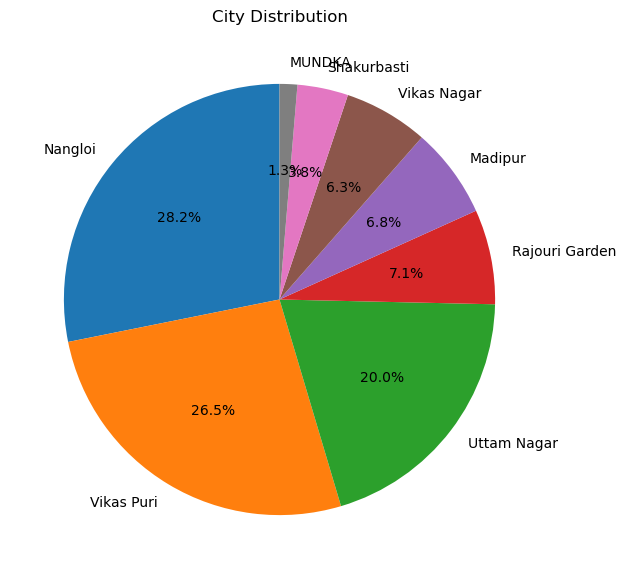

In [7]:
# Step 3: Pie chart for city distribution
city_counts = df['city'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('City Distribution')
plt.show()


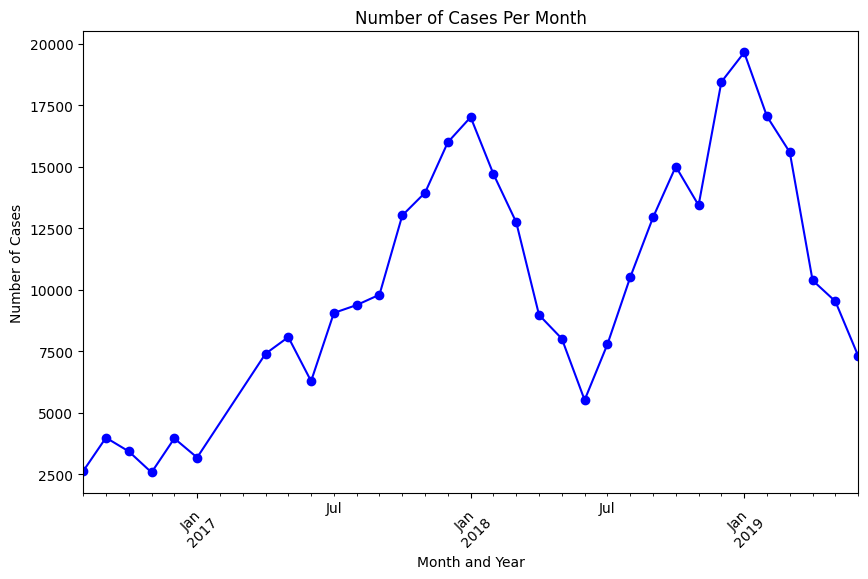

In [4]:
# Step 4: Line chart for number of cases based on month and year (using the 'date' column)
df['date'] = pd.to_datetime(df['date'])  # Ensure the date column is in datetime format
df['year_month'] = df['date'].dt.to_period('M')  # Extract year-month period

# Count the number of cases per month
monthly_cases = df.groupby('year_month').size()

plt.figure(figsize=(10, 6))
monthly_cases.plot(kind='line', marker='o', color='blue')
plt.title('Number of Cases Per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()


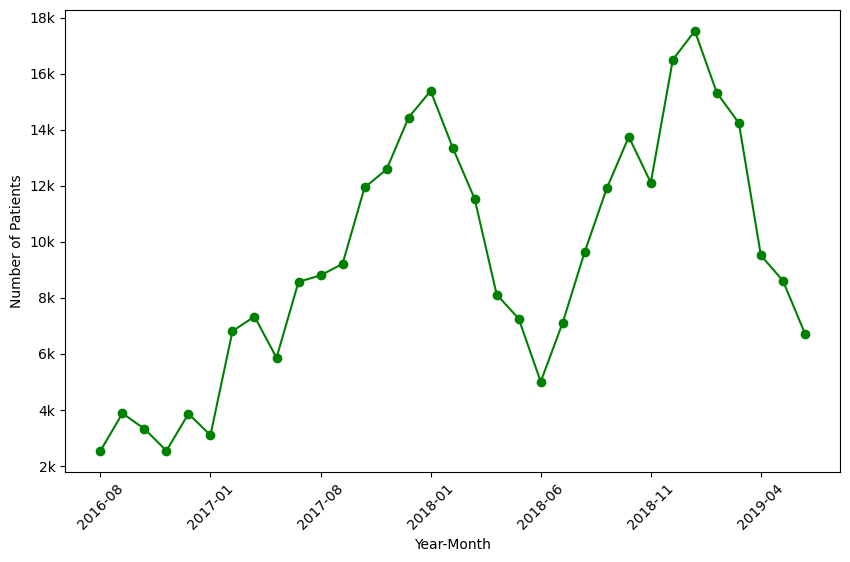

In [14]:
# Step 5: Line chart for unique IDs (persons who visit only once per month)
df['year_month'] = df['date'].dt.to_period('M')  # Extract year-month period
df['year_month'] = df['date'].dt.strftime('%Y-%m')  

unique_ids_per_month = df.groupby('year_month')['medongoid'].nunique()

plt.figure(figsize=(10, 6))
ax = unique_ids_per_month.plot(kind='line', marker='o', color='green')
plt.xlabel('Year-Month')
plt.ylabel('Number of Patients')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.xticks(rotation=45)
plt.show()

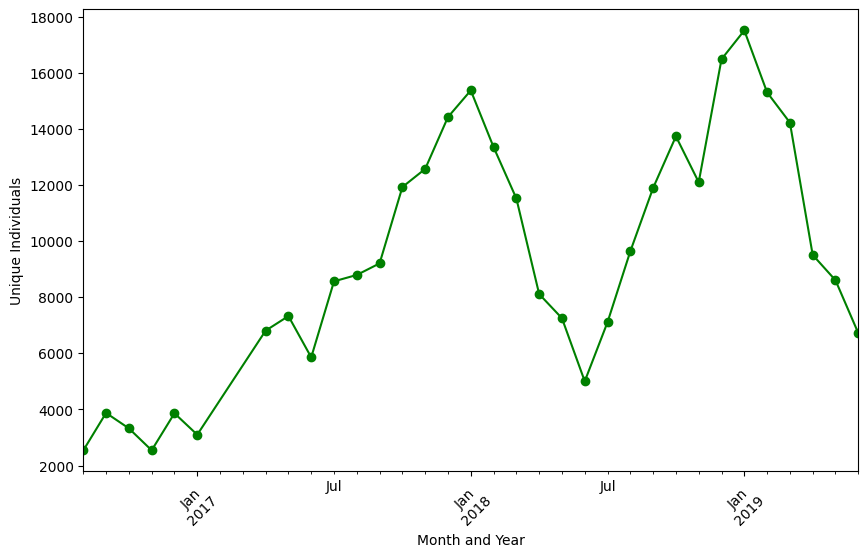

In [13]:
# Step 5: Line chart for unique IDs (persons who visit only once per month)
df['year_month'] = df['date'].dt.to_period('M')  # Extract year-month period
unique_ids_per_month = df.groupby('year_month')['medongoid'].nunique()

plt.figure(figsize=(10, 6))
unique_ids_per_month.plot(kind='line', marker='o', color='green')

plt.xlabel('Month and Year')
plt.ylabel('Unique Individuals')
plt.xticks(rotation=45)


plt.show()


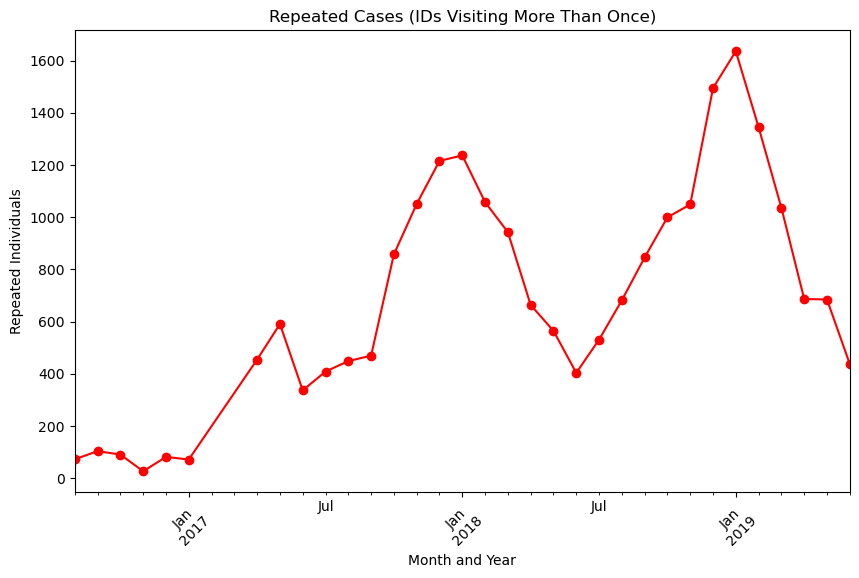

In [10]:
# Step 6: Graph for repeated cases (IDs with more than one visit)
# First, we need to get medongoid with more than one visit
df['year_month'] = df['date'].dt.to_period('M')  # Extract year-month period
repeated_cases = df.groupby(['medongoid', 'year_month']).size().reset_index(name='visit_count')
repeated_cases = repeated_cases[repeated_cases['visit_count'] > 1]

# Count repeated medongoids per month
repeated_ids_per_month = repeated_cases.groupby('year_month')['medongoid'].nunique()

plt.figure(figsize=(10, 6))
repeated_ids_per_month.plot(kind='line', marker='o', color='red')
plt.title('Repeated Cases (IDs Visiting More Than Once)')
plt.xlabel('Month and Year')
plt.ylabel('Repeated Individuals')
plt.xticks(rotation=45)
plt.show()


In [11]:
import ast

# Step 1: Convert the 'diagnosis' column (which is a string of lists) to actual lists
df['diagnosis'] = df['diagnosis'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Check the result
print(df['diagnosis'].head())


0                             [influenza]
1                 [acute nasopharyngitis]
2    [acute upper respiratory infections]
3                 [acute nasopharyngitis]
4                            [bronchitis]
Name: diagnosis, dtype: object


/var/folders/_r/82ndd3hs65qf8t2kcy6m0pp00000gn/T/ipykernel_14460/1330264109.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data['cluster'] = clusters


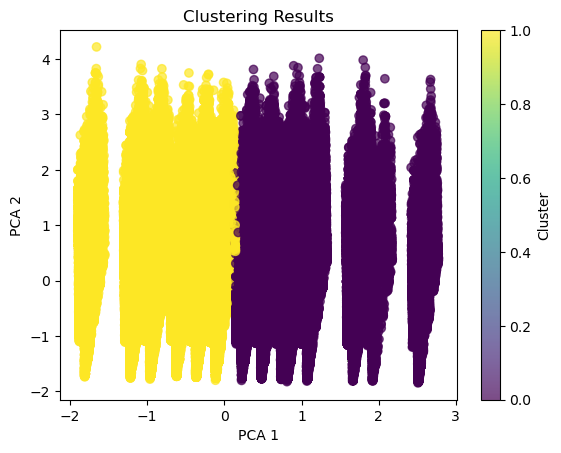

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = df

# Preprocessing
# Convert 'date' into useful components
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['season'] = data['month'] % 12 // 3 + 1  # Winter(1), Spring(2), Summer(3), Autumn(4)

# Flatten and encode the 'diagnosis' column using LabelEncoder
label_encoder = LabelEncoder()
data['diagnosis_encoded'] = label_encoder.fit_transform(
    data['diagnosis'].apply(lambda x: ', '.join(x) if isinstance(x, list) else str(x))
)

# Combine processed features
processed_data = data[['diagnosis_encoded', 'gender', 'age', 'season', 'year']]

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(processed_data)

# Apply K-Means clustering with optimized parameters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(normalized_data)
processed_data['cluster'] = clusters

# Reduce dimensions for visualization (optional)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [13]:
processed_data.head()

,diagnosis_encoded,gender,age,season,year,cluster
0,5032,1,28.0,1,2019,1
1,251,0,52.0,3,2019,1
2,1087,1,3.0,2,2017,0
3,251,0,6.0,3,2019,1
4,2982,0,26.0,3,2019,1


In [14]:
print(processed_data['cluster'].value_counts())


cluster
1    178565
0    158713
Name: count, dtype: int64


In [15]:
# Add cluster assignments to the original dataset
data['cluster'] = processed_data['cluster']

# Create separate DataFrames for each cluster
cluster_0_df = data[data['cluster'] == 0]
cluster_1_df = data[data['cluster'] == 1]

In [16]:
cluster_0_df.head()

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis,age_group,year_month,year,month,season,diagnosis_encoded,cluster
2,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,[acute upper respiratory infections],True,True,0-4 years,2017-04,2017,4,2,1087,0
8,2018-06-27,West,Nangloi,110703,Dr. Suraj,1.226704e+09,12:57:18,0,3.0,[acute upper respiratory infections],True,True,0-4 years,2018-06,2018,6,3,1087,0
10,2017-08-21,West,Nangloi,110719,Ankit,1.233559e+09,14:54:32,0,14.0,"[viral fever, acute nasopharyngitis]",True,True,5-14 years,2017-08,2017,8,3,6497,0
13,2017-04-19,West,Vikas Puri,310710,Dr. Ravikant,1.109156e+09,09:55:27,0,20.0,[influenza],True,True,15-24 years,2017-04,2017,4,2,5032,0
15,2017-05-20,West,Madipur,360718,Dr. Narendra,1.177339e+09,09:52:57,1,50.0,[acute upper respiratory infections],True,True,25-64 years,2017-05,2017,5,2,1087,0


/var/folders/_r/82ndd3hs65qf8t2kcy6m0pp00000gn/T/ipykernel_14460/2749085418.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0_df['diagnosis_count'] = cluster_0_df['diagnosis'].apply(len)
/var/folders/_r/82ndd3hs65qf8t2kcy6m0pp00000gn/T/ipykernel_14460/2749085418.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0_df['date'] = pd.to_datetime(cluster_0_df['date'])


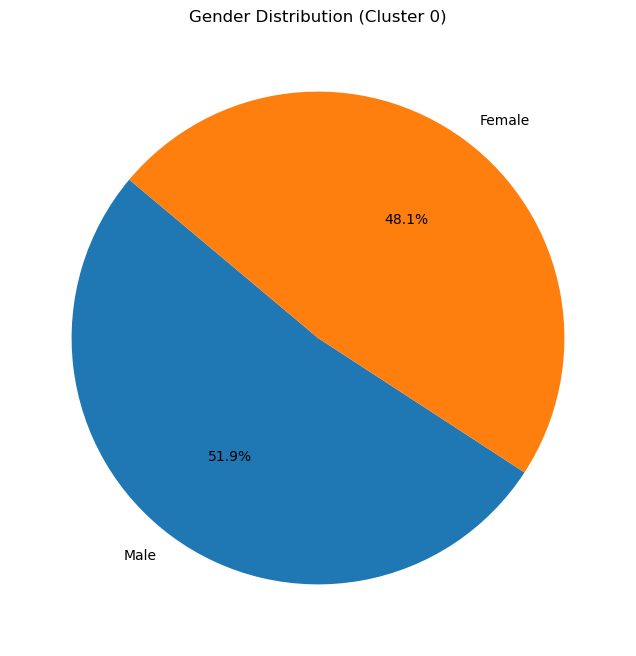

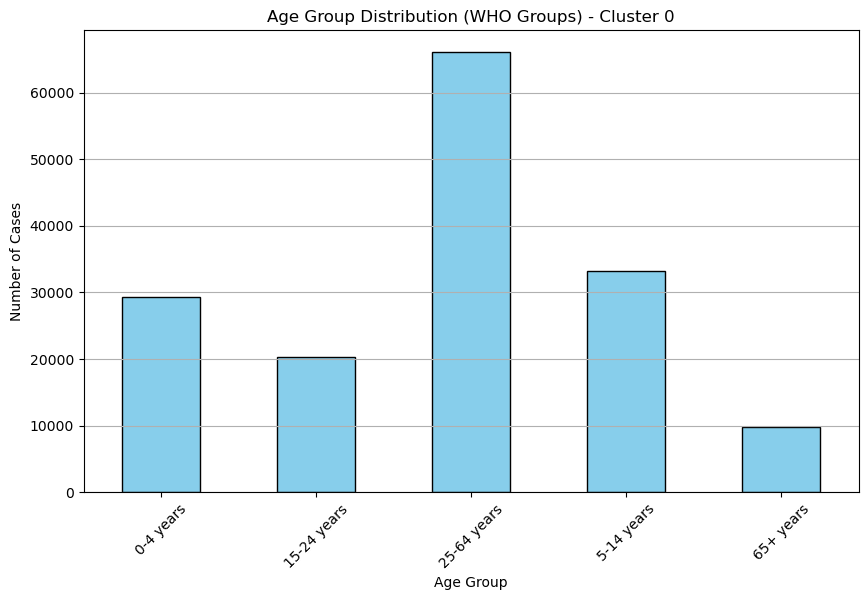

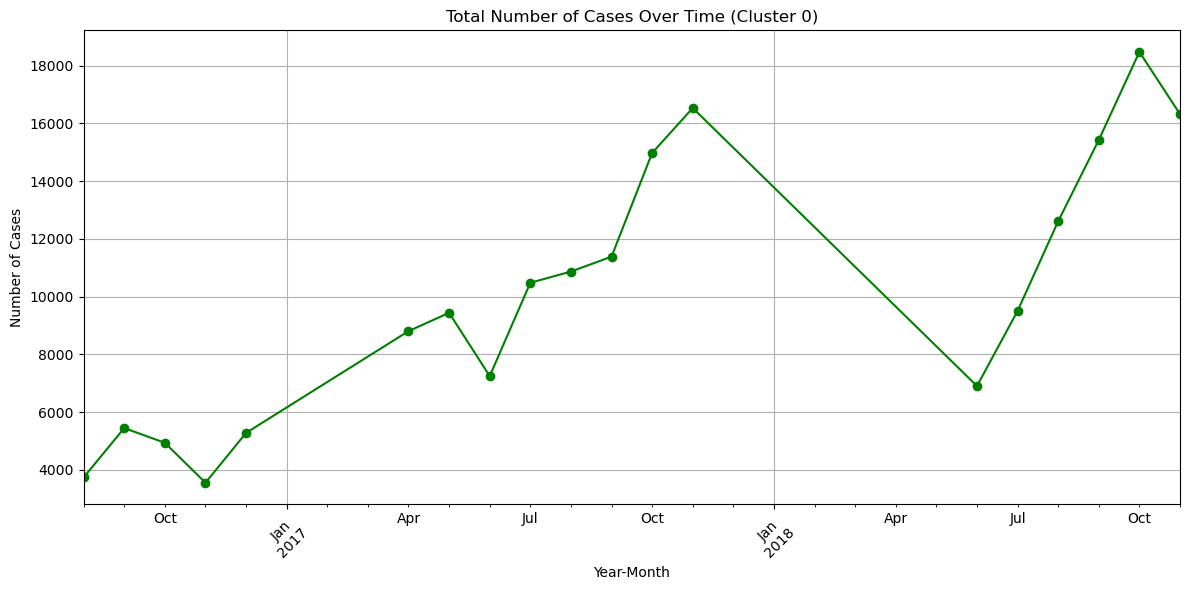

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'diagnosis_count' reflects the count of diagnoses in each row
cluster_0_df['diagnosis_count'] = cluster_0_df['diagnosis'].apply(len)


# Convert 'date' to datetime if necessary
cluster_0_df['date'] = pd.to_datetime(cluster_0_df['date'])

# 1. Pie Chart for Gender Distribution
gender_distribution = cluster_0_df['gender'].value_counts()
gender_labels = ['Male' if g == 1 else 'Female' for g in gender_distribution.index]
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution (Cluster 0)')
plt.show()

# 2. Bar Chart for Age Group Distribution (WHO Groups)
age_group_distribution = cluster_0_df['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Group Distribution (WHO Groups) - Cluster 0')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Line Chart for Total Number of Cases Over Month and Year
cases_over_time = cluster_0_df.groupby('year_month')['diagnosis_count'].sum().sort_index()
plt.figure(figsize=(12, 6))
cases_over_time.plot(kind='line', marker='o', color='green')
plt.title('Total Number of Cases Over Time (Cluster 0)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Cases')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/_r/82ndd3hs65qf8t2kcy6m0pp00000gn/T/ipykernel_14460/770683831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_df['diagnosis_count'] = cluster_1_df['diagnosis'].apply(len)


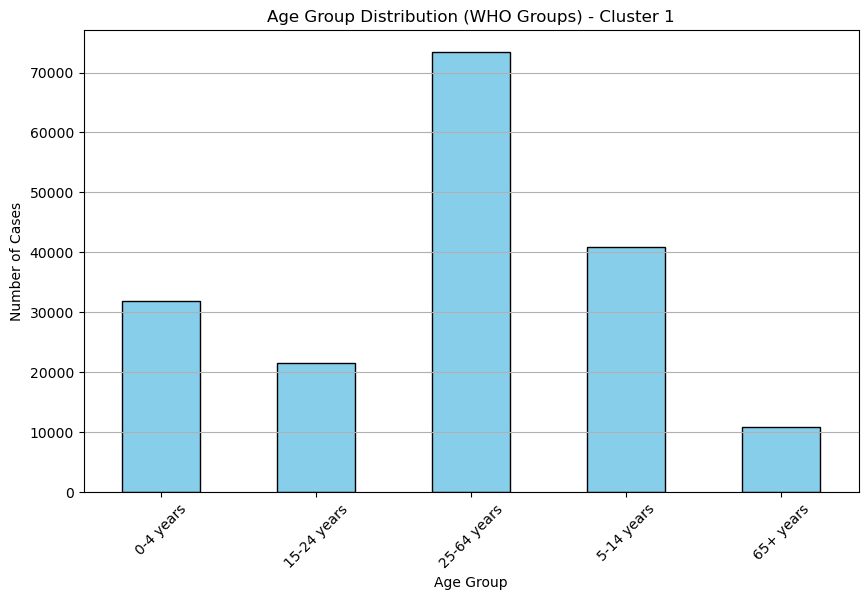

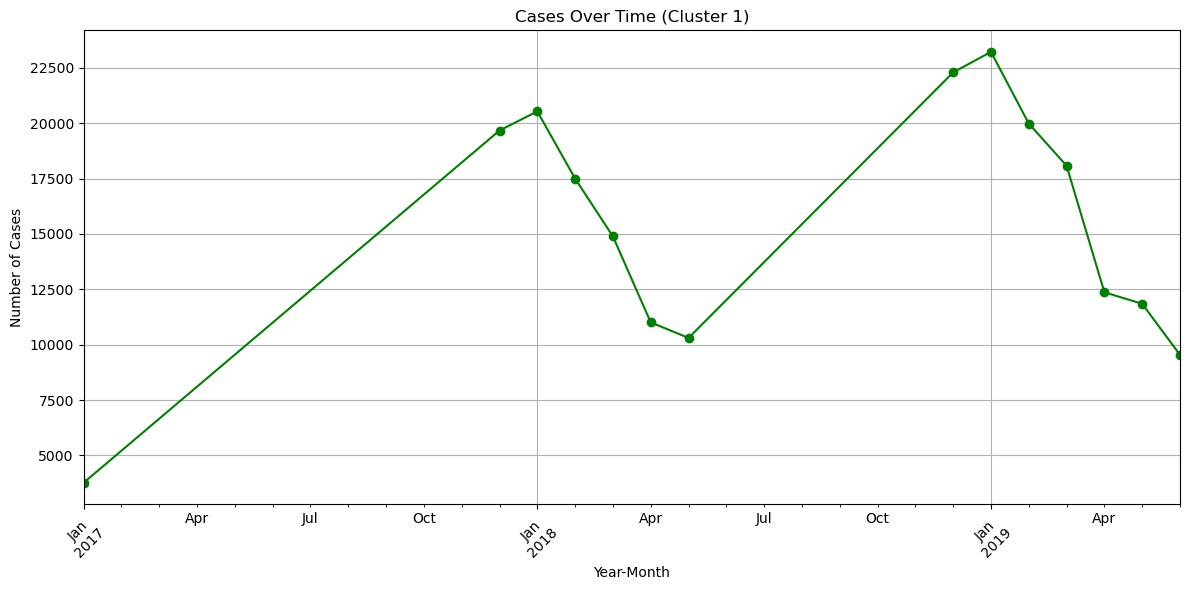

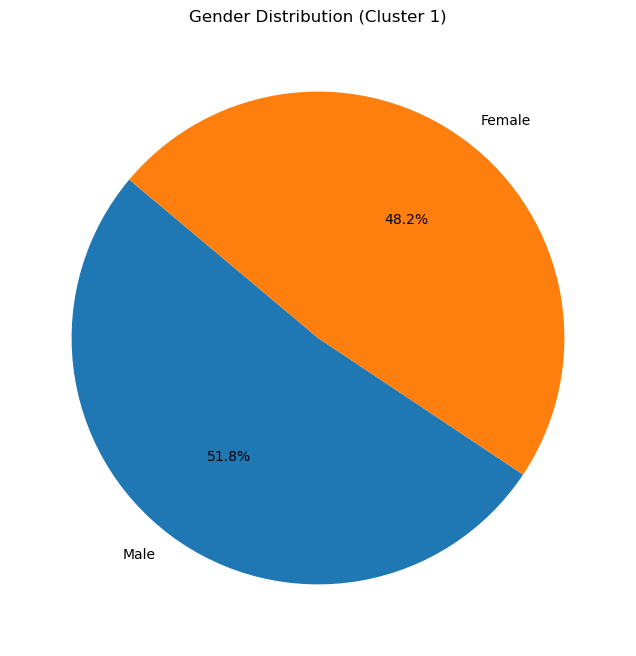

In [18]:
# Ensure 'diagnosis_count' reflects the count of diagnoses in each row
cluster_1_df['diagnosis_count'] = cluster_1_df['diagnosis'].apply(len)


# 2. Bar Chart of Age Group Distribution (WHO Groups)
age_group_distribution = cluster_1_df['age_group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
age_group_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Age Group Distribution (WHO Groups) - Cluster 1')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Line Chart of Cases Over Time
cases_over_time = cluster_1_df.groupby('year_month')['diagnosis_count'].sum().sort_index()
plt.figure(figsize=(12, 6))
cases_over_time.plot(kind='line', marker='o', color='green')
plt.title('Cases Over Time (Cluster 1)')
plt.xlabel('Year-Month')
plt.ylabel('Number of Cases')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Pie Chart of Gender Distribution
gender_distribution = cluster_1_df['gender'].value_counts()
gender_labels = ['Male' if g == 1 else 'Female' for g in gender_distribution.index]
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution (Cluster 1)')
plt.show()


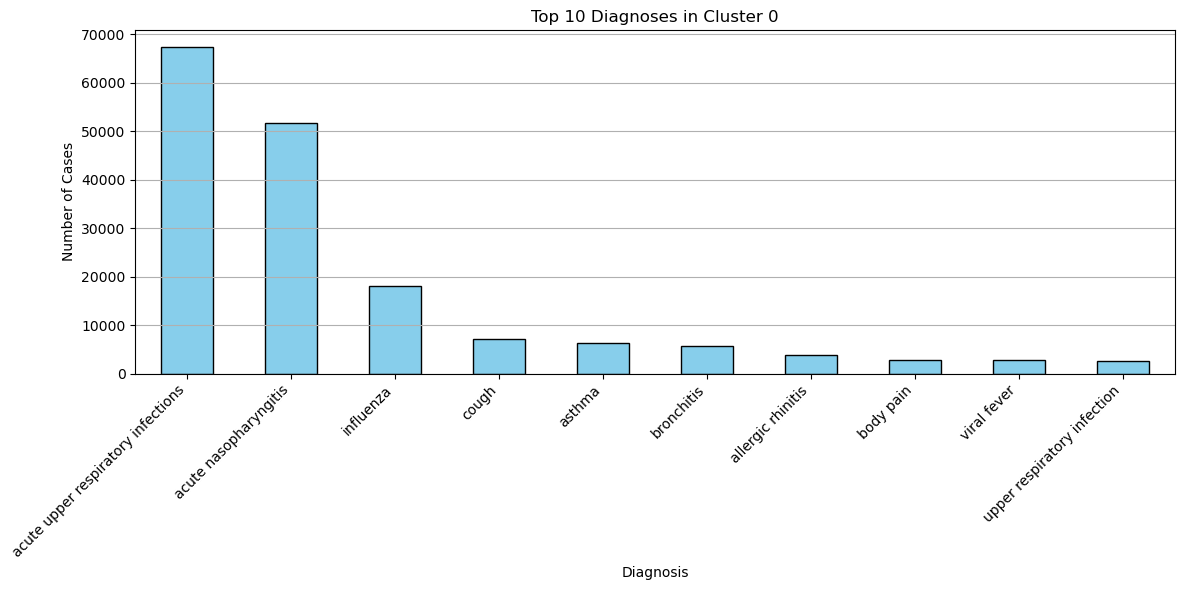

In [19]:
import matplotlib.pyplot as plt

# Explode the 'diagnosis' column to get individual diagnoses
cluster_0_diagnoses = cluster_0_df.explode('diagnosis')

# Count the frequency of each diagnosis
diagnosis_counts_0 = cluster_0_diagnoses['diagnosis'].value_counts()

# Get the top 10 diagnoses
top_10_diagnoses_0 = diagnosis_counts_0.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_diagnoses_0.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Diagnoses in Cluster 0')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


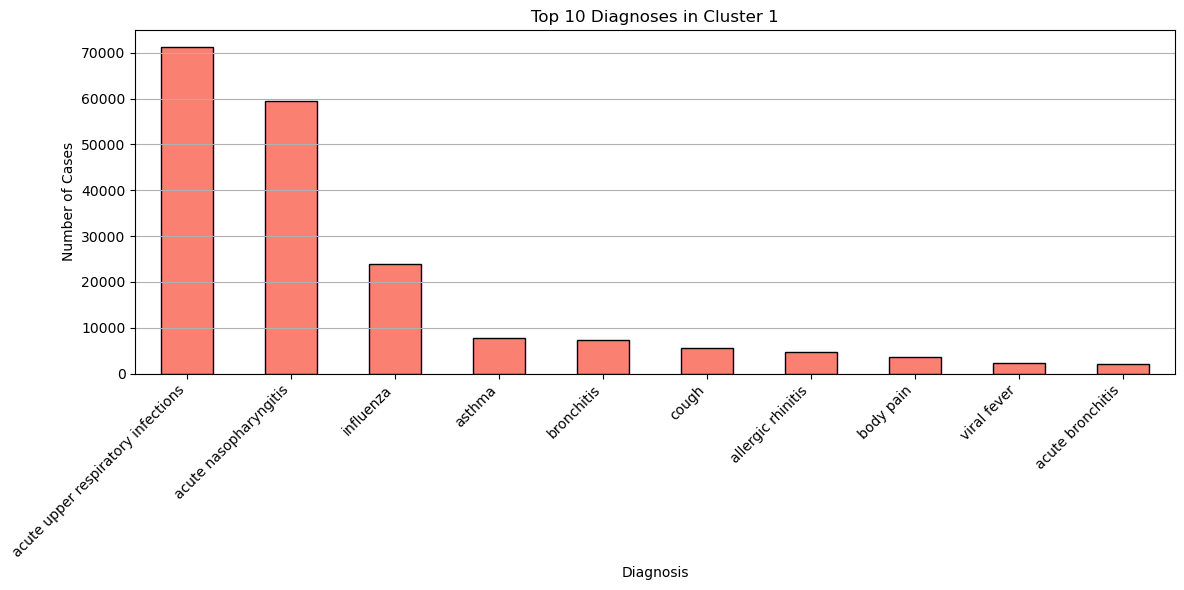

In [20]:
# Explode the 'diagnosis' column to get individual diagnoses
cluster_1_diagnoses = cluster_1_df.explode('diagnosis')

# Count the frequency of each diagnosis
diagnosis_counts_1 = cluster_1_diagnoses['diagnosis'].value_counts()

# Get the top 10 diagnoses
top_10_diagnoses_1 = diagnosis_counts_1.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_diagnoses_1.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Diagnoses in Cluster 1')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [21]:
df.head()

,date,district,city,facilityid,doctorname,medongoid,appointmenttime,gender,age,diagnosis,is_respiratory,respiratory_diagnosis,age_group,year_month,year,month,season,diagnosis_encoded,cluster
0,2019-01-04,West,Vikas Puri,310710,Dr. Ravikant,1.367039e+09,10:06:51,1,28.0,[influenza],True,True,25-64 years,2019-01,2019,1,1,5032,1
1,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367939e+09,11:18:14,0,52.0,[acute nasopharyngitis],True,True,25-64 years,2019-06,2019,6,3,251,1
2,2017-04-26,West,Uttam Nagar,320720,Pramod,1.121171e+09,10:41:09,1,3.0,[acute upper respiratory infections],True,True,0-4 years,2017-04,2017,4,2,1087,0
3,2019-06-29,West,Uttam Nagar,320712,Dr. R.C.Khanna,1.367938e+09,12:42:33,0,6.0,[acute nasopharyngitis],True,True,5-14 years,2019-06,2019,6,3,251,1
4,2019-06-28,West,Uttam Nagar,320720,Pramod,1.367938e+09,12:21:19,0,26.0,[bronchitis],True,True,25-64 years,2019-06,2019,6,3,2982,1


In [22]:
df.columns

Index(['date', 'district', 'city', 'facilityid', 'doctorname', 'medongoid',
       'appointmenttime', 'gender', 'age', 'diagnosis', 'is_respiratory',
       'respiratory_diagnosis', 'age_group', 'year_month', 'year', 'month',
       'season', 'diagnosis_encoded', 'cluster'],
      dtype='object')

RMSE: 44.167697939822226, R²: 0.9479519198849625


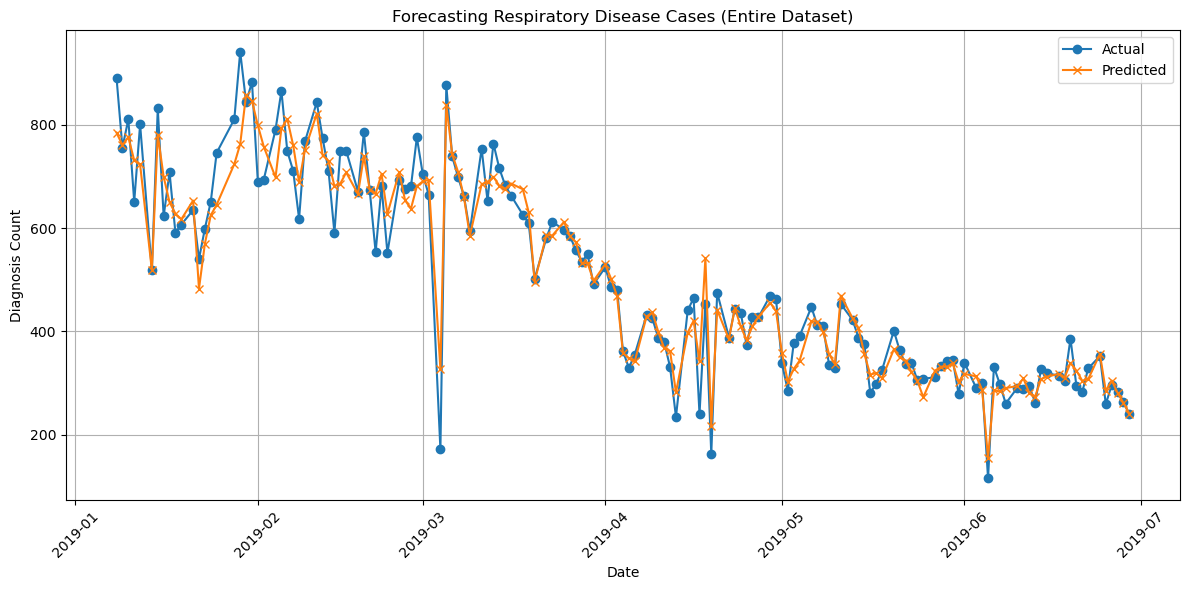

In [23]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocess data
def preprocess_data(df):
    # Aggregate by date
    time_series = df.groupby('date').agg({
        'diagnosis_encoded': 'count',  # Target: count diagnoses per day
        'age': 'mean',  # Average age
        'gender': 'mean'  # Average gender (proportion of males)
    }).reset_index()
    time_series.rename(columns={'diagnosis_encoded': 'diagnosis_count'}, inplace=True)
    
    # Extract temporal features
    time_series['month'] = time_series['date'].dt.month
    time_series['day_of_week'] = time_series['date'].dt.dayofweek
    time_series['season'] = (time_series['month'] % 12 // 3) + 1  # Winter(1), Spring(2), Summer(3), Autumn(4)
    
    # Create lag features
    for lag in range(1, 7):  # Lag features up to 6
        time_series[f'diagnosis_count_lag_{lag}'] = time_series['diagnosis_count'].shift(lag)
    
    # Add rolling averages
    time_series['rolling_mean_3'] = time_series['diagnosis_count'].rolling(window=3).mean()
    time_series['rolling_mean_7'] = time_series['diagnosis_count'].rolling(window=7).mean()
    
    # Drop rows with NaN values due to lagging/rolling
    time_series = time_series.dropna()
    return time_series

# Preprocess the dataset
time_series = preprocess_data(df)

# Define features and target
features = ['age', 'gender', 'month', 'day_of_week', 'season'] + \
           [f'diagnosis_count_lag_{i}' for i in range(1, 7)] + \
           ['rolling_mean_3', 'rolling_mean_7']
X = time_series[features]
y = time_series['diagnosis_count']

# Train-test split
train_size = int(len(time_series) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R²: {r2}")

# Plot actual vs predicted with proper dates on x-axis
plt.figure(figsize=(12, 6))
plt.plot(time_series['date'][train_size:], y_test.values, label='Actual', marker='o')
plt.plot(time_series['date'][train_size:], y_pred, label='Predicted', marker='x')
plt.title('Forecasting Respiratory Disease Cases (Entire Dataset)')
plt.xlabel('Date')
plt.ylabel('Diagnosis Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


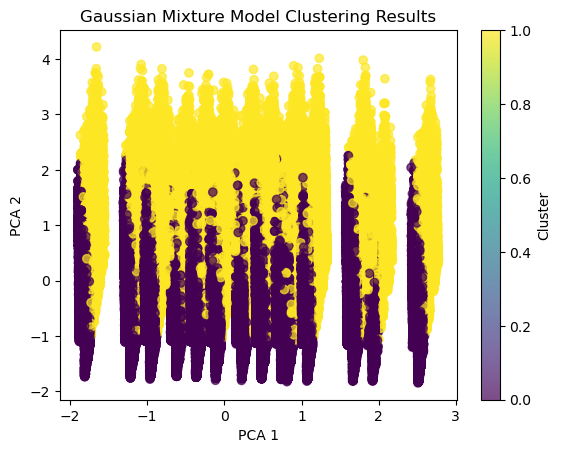

Clusters found: [0 1]


In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(normalized_data)

# Visualize GMM clustering result using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=gmm_clusters, cmap='viridis', alpha=0.7)
plt.title('Gaussian Mixture Model Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Check the number of clusters
print(f'Clusters found: {np.unique(gmm_clusters)}')


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

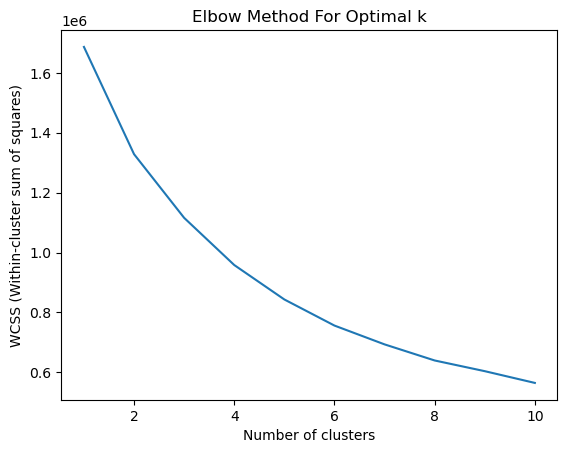

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use a range of clusters to determine the optimal number
wcss = []  # Within-cluster sum of squares (inertia)
for i in range(1, 11):  # Try clustering with 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()


RMSE: 44.167697939822226, R²: 0.9479519198849625


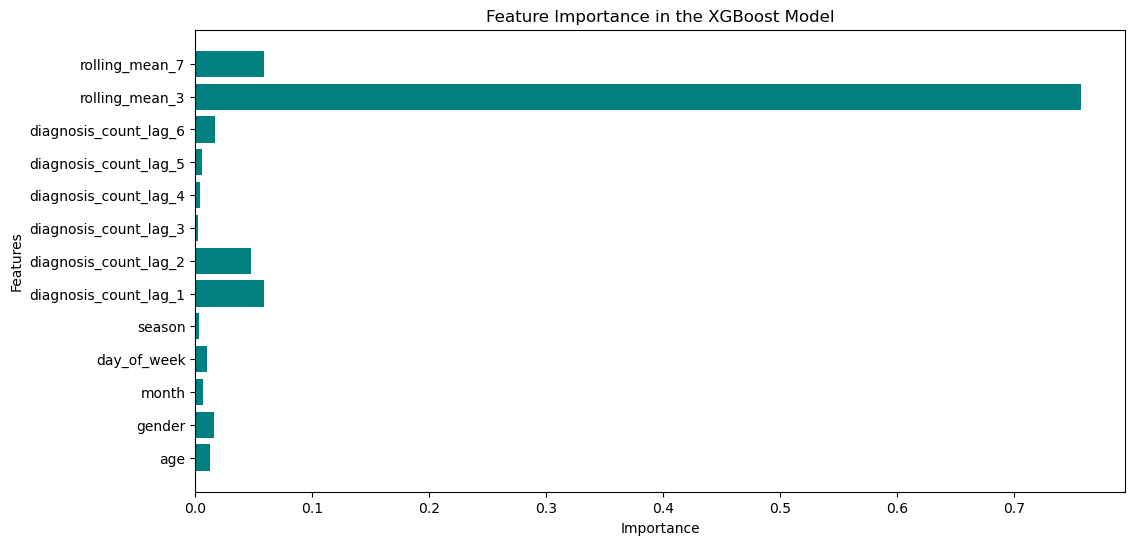

In [26]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocess data (same as before)
def preprocess_data(df):
    # Aggregate by date
    time_series = df.groupby('date').agg({
        'diagnosis_encoded': 'count',  # Target: count diagnoses per day
        'age': 'mean',  # Average age
        'gender': 'mean'  # Average gender (proportion of males)
    }).reset_index()
    time_series.rename(columns={'diagnosis_encoded': 'diagnosis_count'}, inplace=True)
    
    # Extract temporal features
    time_series['month'] = time_series['date'].dt.month
    time_series['day_of_week'] = time_series['date'].dt.dayofweek
    time_series['season'] = (time_series['month'] % 12 // 3) + 1  # Winter(1), Spring(2), Summer(3), Autumn(4)
    
    # Create lag features
    for lag in range(1, 7):  # Lag features up to 6
        time_series[f'diagnosis_count_lag_{lag}'] = time_series['diagnosis_count'].shift(lag)
    
    # Add rolling averages
    time_series['rolling_mean_3'] = time_series['diagnosis_count'].rolling(window=3).mean()
    time_series['rolling_mean_7'] = time_series['diagnosis_count'].rolling(window=7).mean()
    
    # Drop rows with NaN values due to lagging/rolling
    time_series = time_series.dropna()
    return time_series

# Preprocess the dataset
time_series = preprocess_data(df)

# Define features and target
features = ['age', 'gender', 'month', 'day_of_week', 'season'] + \
           [f'diagnosis_count_lag_{i}' for i in range(1, 7)] + \
           ['rolling_mean_3', 'rolling_mean_7']
X = time_series[features]
y = time_series['diagnosis_count']

# Train-test split
train_size = int(len(time_series) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train XGBoost model
model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R²: {r2}")

# Feature Importance: Get the feature importances from the model
feature_importance = model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance, color='teal')
plt.title('Feature Importance in the XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [27]:
import numpy as np
unique, counts = np.unique(clusters, return_counts=True)
print(f"Cluster distribution: {dict(zip(unique, counts))}")


Cluster distribution: {0: 158713, 1: 178565}


RMSE: 58.86432496054995, R²: 0.9075515737838914


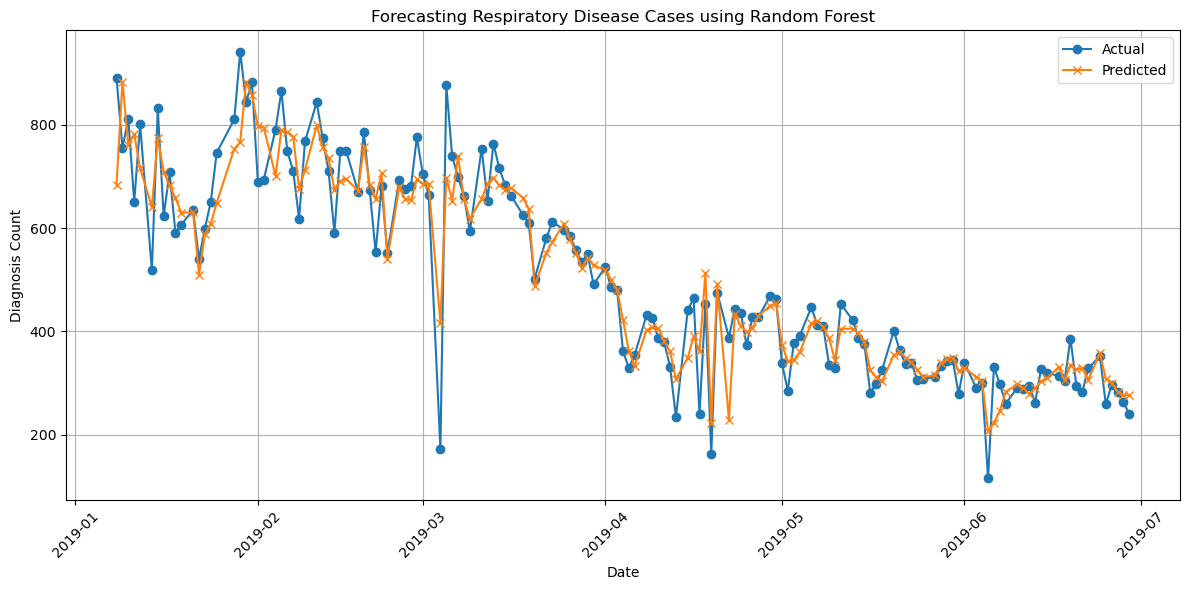

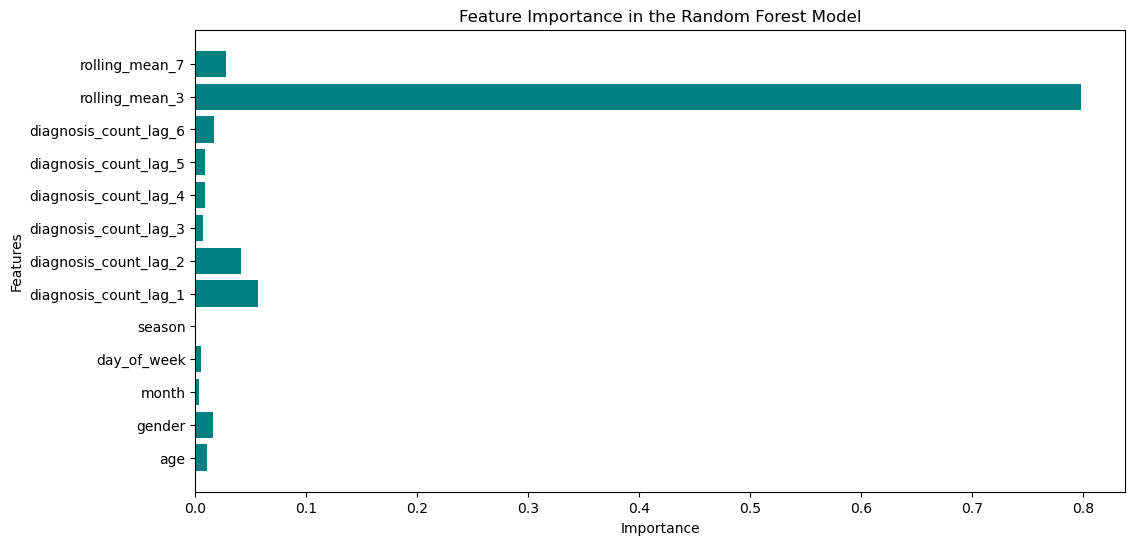

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Preprocess data (same as before)
def preprocess_data(df):
    # Aggregate by date
    time_series = df.groupby('date').agg({
        'diagnosis_encoded': 'count',  # Target: count diagnoses per day
        'age': 'mean',  # Average age
        'gender': 'mean'  # Average gender (proportion of males)
    }).reset_index()
    time_series.rename(columns={'diagnosis_encoded': 'diagnosis_count'}, inplace=True)
    
    # Extract temporal features
    time_series['month'] = time_series['date'].dt.month
    time_series['day_of_week'] = time_series['date'].dt.dayofweek
    time_series['season'] = (time_series['month'] % 12 // 3) + 1  # Winter(1), Spring(2), Summer(3), Autumn(4)
    
    # Create lag features
    for lag in range(1, 7):  # Lag features up to 6
        time_series[f'diagnosis_count_lag_{lag}'] = time_series['diagnosis_count'].shift(lag)
    
    # Add rolling averages
    time_series['rolling_mean_3'] = time_series['diagnosis_count'].rolling(window=3).mean()
    time_series['rolling_mean_7'] = time_series['diagnosis_count'].rolling(window=7).mean()
    
    # Drop rows with NaN values due to lagging/rolling
    time_series = time_series.dropna()
    return time_series

# Preprocess the dataset
time_series = preprocess_data(df)

# Define features and target
features = ['age', 'gender', 'month', 'day_of_week', 'season'] + \
           [f'diagnosis_count_lag_{i}' for i in range(1, 7)] + \
           ['rolling_mean_3', 'rolling_mean_7']
X = time_series[features]
y = time_series['diagnosis_count']

# Train-test split
train_size = int(len(time_series) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R²: {r2}")

# Plot actual vs predicted with proper dates on x-axis
plt.figure(figsize=(12, 6))
plt.plot(time_series['date'][train_size:], y_test.values, label='Actual', marker='o')
plt.plot(time_series['date'][train_size:], y_pred, label='Predicted', marker='x')
plt.title('Forecasting Respiratory Disease Cases using Random Forest')
plt.xlabel('Date')
plt.ylabel('Diagnosis Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Feature Importance: Get the feature importances from the Random Forest model
feature_importance = model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importance, color='teal')
plt.title('Feature Importance in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


RMSE: 53.14121404662232, R²: 0.9246543593007398


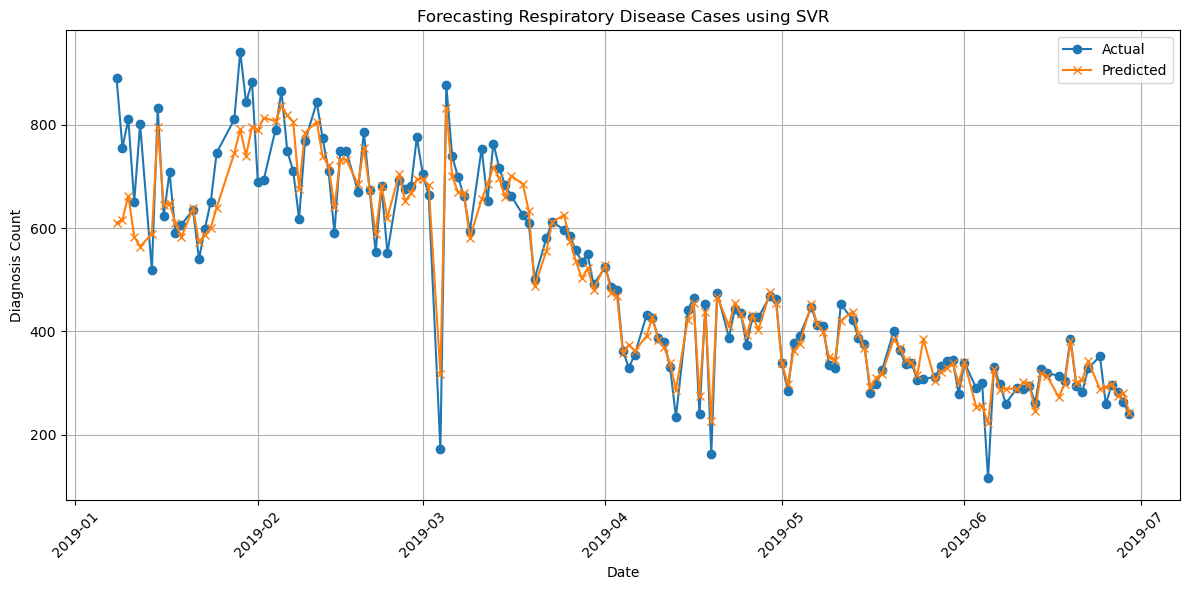

In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Preprocess data (same as before)
def preprocess_data(df):
    # Aggregate by date
    time_series = df.groupby('date').agg({
        'diagnosis_encoded': 'count',  # Target: count diagnoses per day
        'age': 'mean',  # Average age
        'gender': 'mean'  # Average gender (proportion of males)
    }).reset_index()
    time_series.rename(columns={'diagnosis_encoded': 'diagnosis_count'}, inplace=True)
    
    # Extract temporal features
    time_series['month'] = time_series['date'].dt.month
    time_series['day_of_week'] = time_series['date'].dt.dayofweek
    time_series['season'] = (time_series['month'] % 12 // 3) + 1  # Winter(1), Spring(2), Summer(3), Autumn(4)
    
    # Create lag features
    for lag in range(1, 7):  # Lag features up to 6
        time_series[f'diagnosis_count_lag_{lag}'] = time_series['diagnosis_count'].shift(lag)
    
    # Add rolling averages
    time_series['rolling_mean_3'] = time_series['diagnosis_count'].rolling(window=3).mean()
    time_series['rolling_mean_7'] = time_series['diagnosis_count'].rolling(window=7).mean()
    
    # Drop rows with NaN values due to lagging/rolling
    time_series = time_series.dropna()
    return time_series

# Preprocess the dataset
time_series = preprocess_data(df)

# Define features and target
features = ['age', 'gender', 'month', 'day_of_week', 'season'] + \
           [f'diagnosis_count_lag_{i}' for i in range(1, 7)] + \
           ['rolling_mean_3', 'rolling_mean_7']
X = time_series[features]
y = time_series['diagnosis_count']

# Train-test split
train_size = int(len(time_series) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled.ravel())

# Predictions
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse scaling to get the original values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse}, R²: {r2}")

# Plot actual vs predicted with proper dates on x-axis
plt.figure(figsize=(12, 6))
plt.plot(time_series['date'][train_size:], y_test_actual, label='Actual', marker='o')
plt.plot(time_series['date'][train_size:], y_pred, label='Predicted', marker='x')
plt.title('Forecasting Respiratory Disease Cases using SVR')
plt.xlabel('Date')
plt.ylabel('Diagnosis Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py:357: UserWarning: Converting column-vector to 1d array
  _log_warning("Converting column-vector to 1d array")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1967
[LightGBM] [Info] Number of data points in the train set: 587, number of used features: 13
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

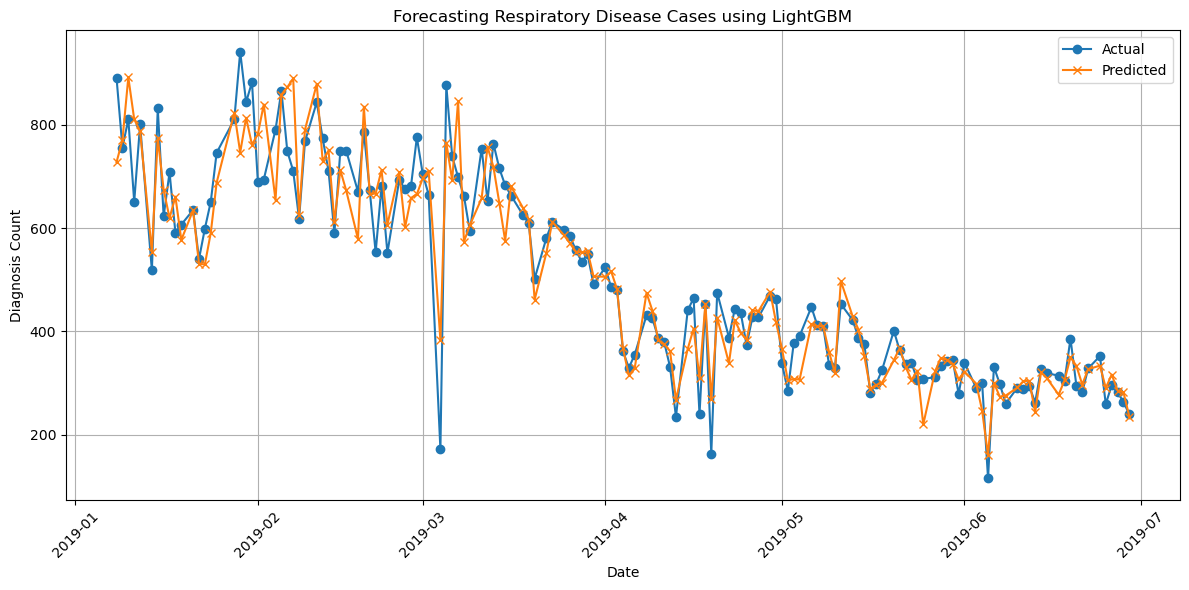

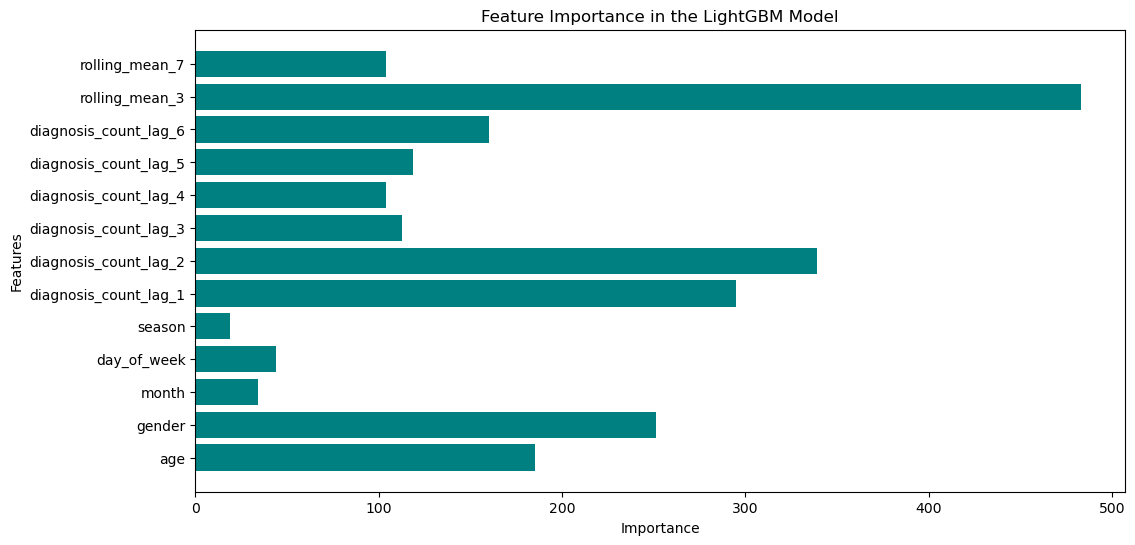

In [34]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Preprocess data (same as before)
def preprocess_data(df):
    # Aggregate by date
    time_series = df.groupby('date').agg({
        'diagnosis_encoded': 'count',  # Target: count diagnoses per day
        'age': 'mean',  # Average age
        'gender': 'mean'  # Average gender (proportion of males)
    }).reset_index()
    time_series.rename(columns={'diagnosis_encoded': 'diagnosis_count'}, inplace=True)
    
    # Extract temporal features
    time_series['month'] = time_series['date'].dt.month
    time_series['day_of_week'] = time_series['date'].dt.dayofweek
    time_series['season'] = (time_series['month'] % 12 // 3) + 1  # Winter(1), Spring(2), Summer(3), Autumn(4)
    
    # Create lag features
    for lag in range(1, 7):  # Lag features up to 6
        time_series[f'diagnosis_count_lag_{lag}'] = time_series['diagnosis_count'].shift(lag)
    
    # Add rolling averages
    time_series['rolling_mean_3'] = time_series['diagnosis_count'].rolling(window=3).mean()
    time_series['rolling_mean_7'] = time_series['diagnosis_count'].rolling(window=7).mean()
    
    # Drop rows with NaN values due to lagging/rolling
    time_series = time_series.dropna()
    return time_series

# Preprocess the dataset
time_series = preprocess_data(df)

# Define features and target
features = ['age', 'gender', 'month', 'day_of_week', 'season'] + \
           [f'diagnosis_count_lag_{i}' for i in range(1, 7)] + \
           ['rolling_mean_3', 'rolling_mean_7']
X = time_series[features]
y = time_series['diagnosis_count']

# Train-test split
train_size = int(len(time_series) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train LightGBM model
train_data = lgb.Dataset(X_train_scaled, label=y_train_scaled)
params = {
    'objective': 'regression',
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',
    'num_leaves': 31,  # Number of leaves in one tree
    'learning_rate': 0.1,
    'feature_fraction': 0.9
}

# Train the model
lgb_model = lgb.train(params, train_data, num_boost_round=100)

# Predictions
y_pred_scaled = lgb_model.predict(X_test_scaled)

# Inverse scaling to get the original values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"RMSE: {rmse}, R²: {r2}")

# Plot actual vs predicted with proper dates on x-axis
plt.figure(figsize=(12, 6))
plt.plot(time_series['date'][train_size:], y_test_actual, label='Actual', marker='o')
plt.plot(time_series['date'][train_size:], y_pred, label='Predicted', marker='x')
plt.title('Forecasting Respiratory Disease Cases using LightGBM')
plt.xlabel('Date')
plt.ylabel('Diagnosis Count')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Feature Importance: Get the feature importances from the LightGBM model
lgb_importance = lgb_model.feature_importance()

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, lgb_importance, color='teal')
plt.title('Feature Importance in the LightGBM Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
